In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import pywt

panel_data_df = pd.read_pickle('data/panel_data.pkl')
panel_data_df.set_index("index", inplace=True)
panel_data_df.index = pd.to_datetime(panel_data_df.index)
panel_data_df


,Maturity 1,Maturity 2,Maturity 3,Maturity 4,Maturity 5
index,,,,,
1988-01-04,187.5,193.5,198.25,200.0,202.75
1988-01-05,187.5,193.25,197.25,198.25,200.75
1988-01-06,191.0,195.75,199.75,201.75,204.5
1988-01-07,192.75,198.75,202.75,204.5,208.5
1988-01-08,192.5,198.0,202.0,203.5,207.25
...,...,...,...,...,...
2023-12-22,473.0,485.75,495.5,498.25,504.5
2023-12-26,480.25,492.25,501.5,503.5,509.5
2023-12-27,476.5,488.5,498.0,500.25,506.5


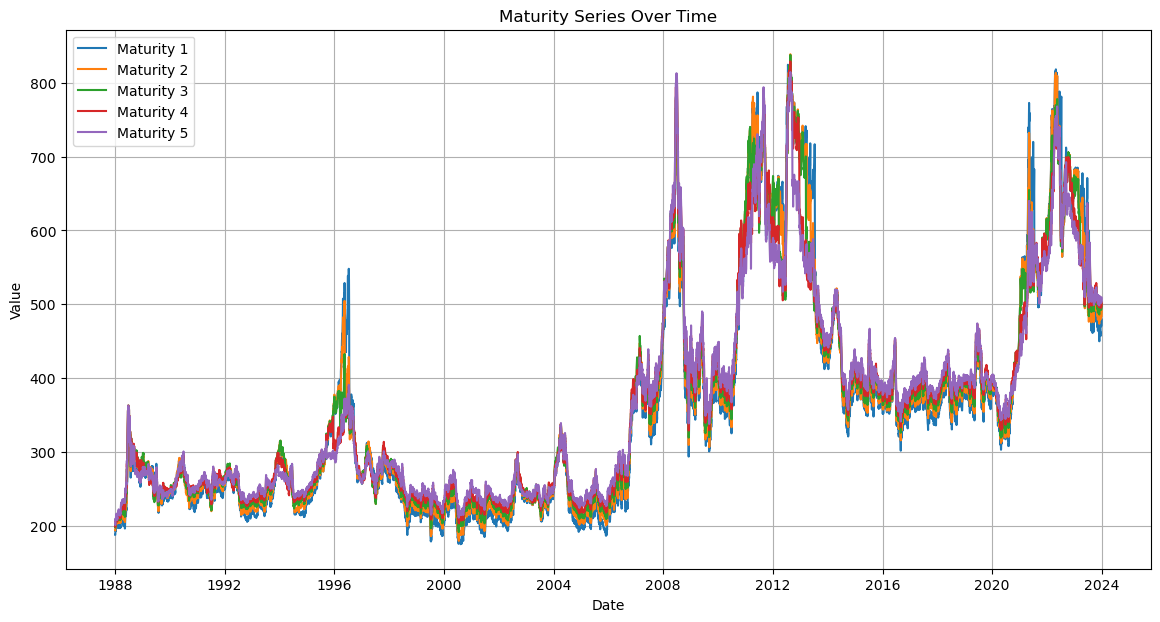

In [84]:
panel_data_df  = panel_data_df

# Plotting the series
plt.figure(figsize=(14, 7))
for column in panel_data_df.columns:
    plt.plot(panel_data_df.index, panel_data_df[column], label=column)

plt.title('Maturity Series Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

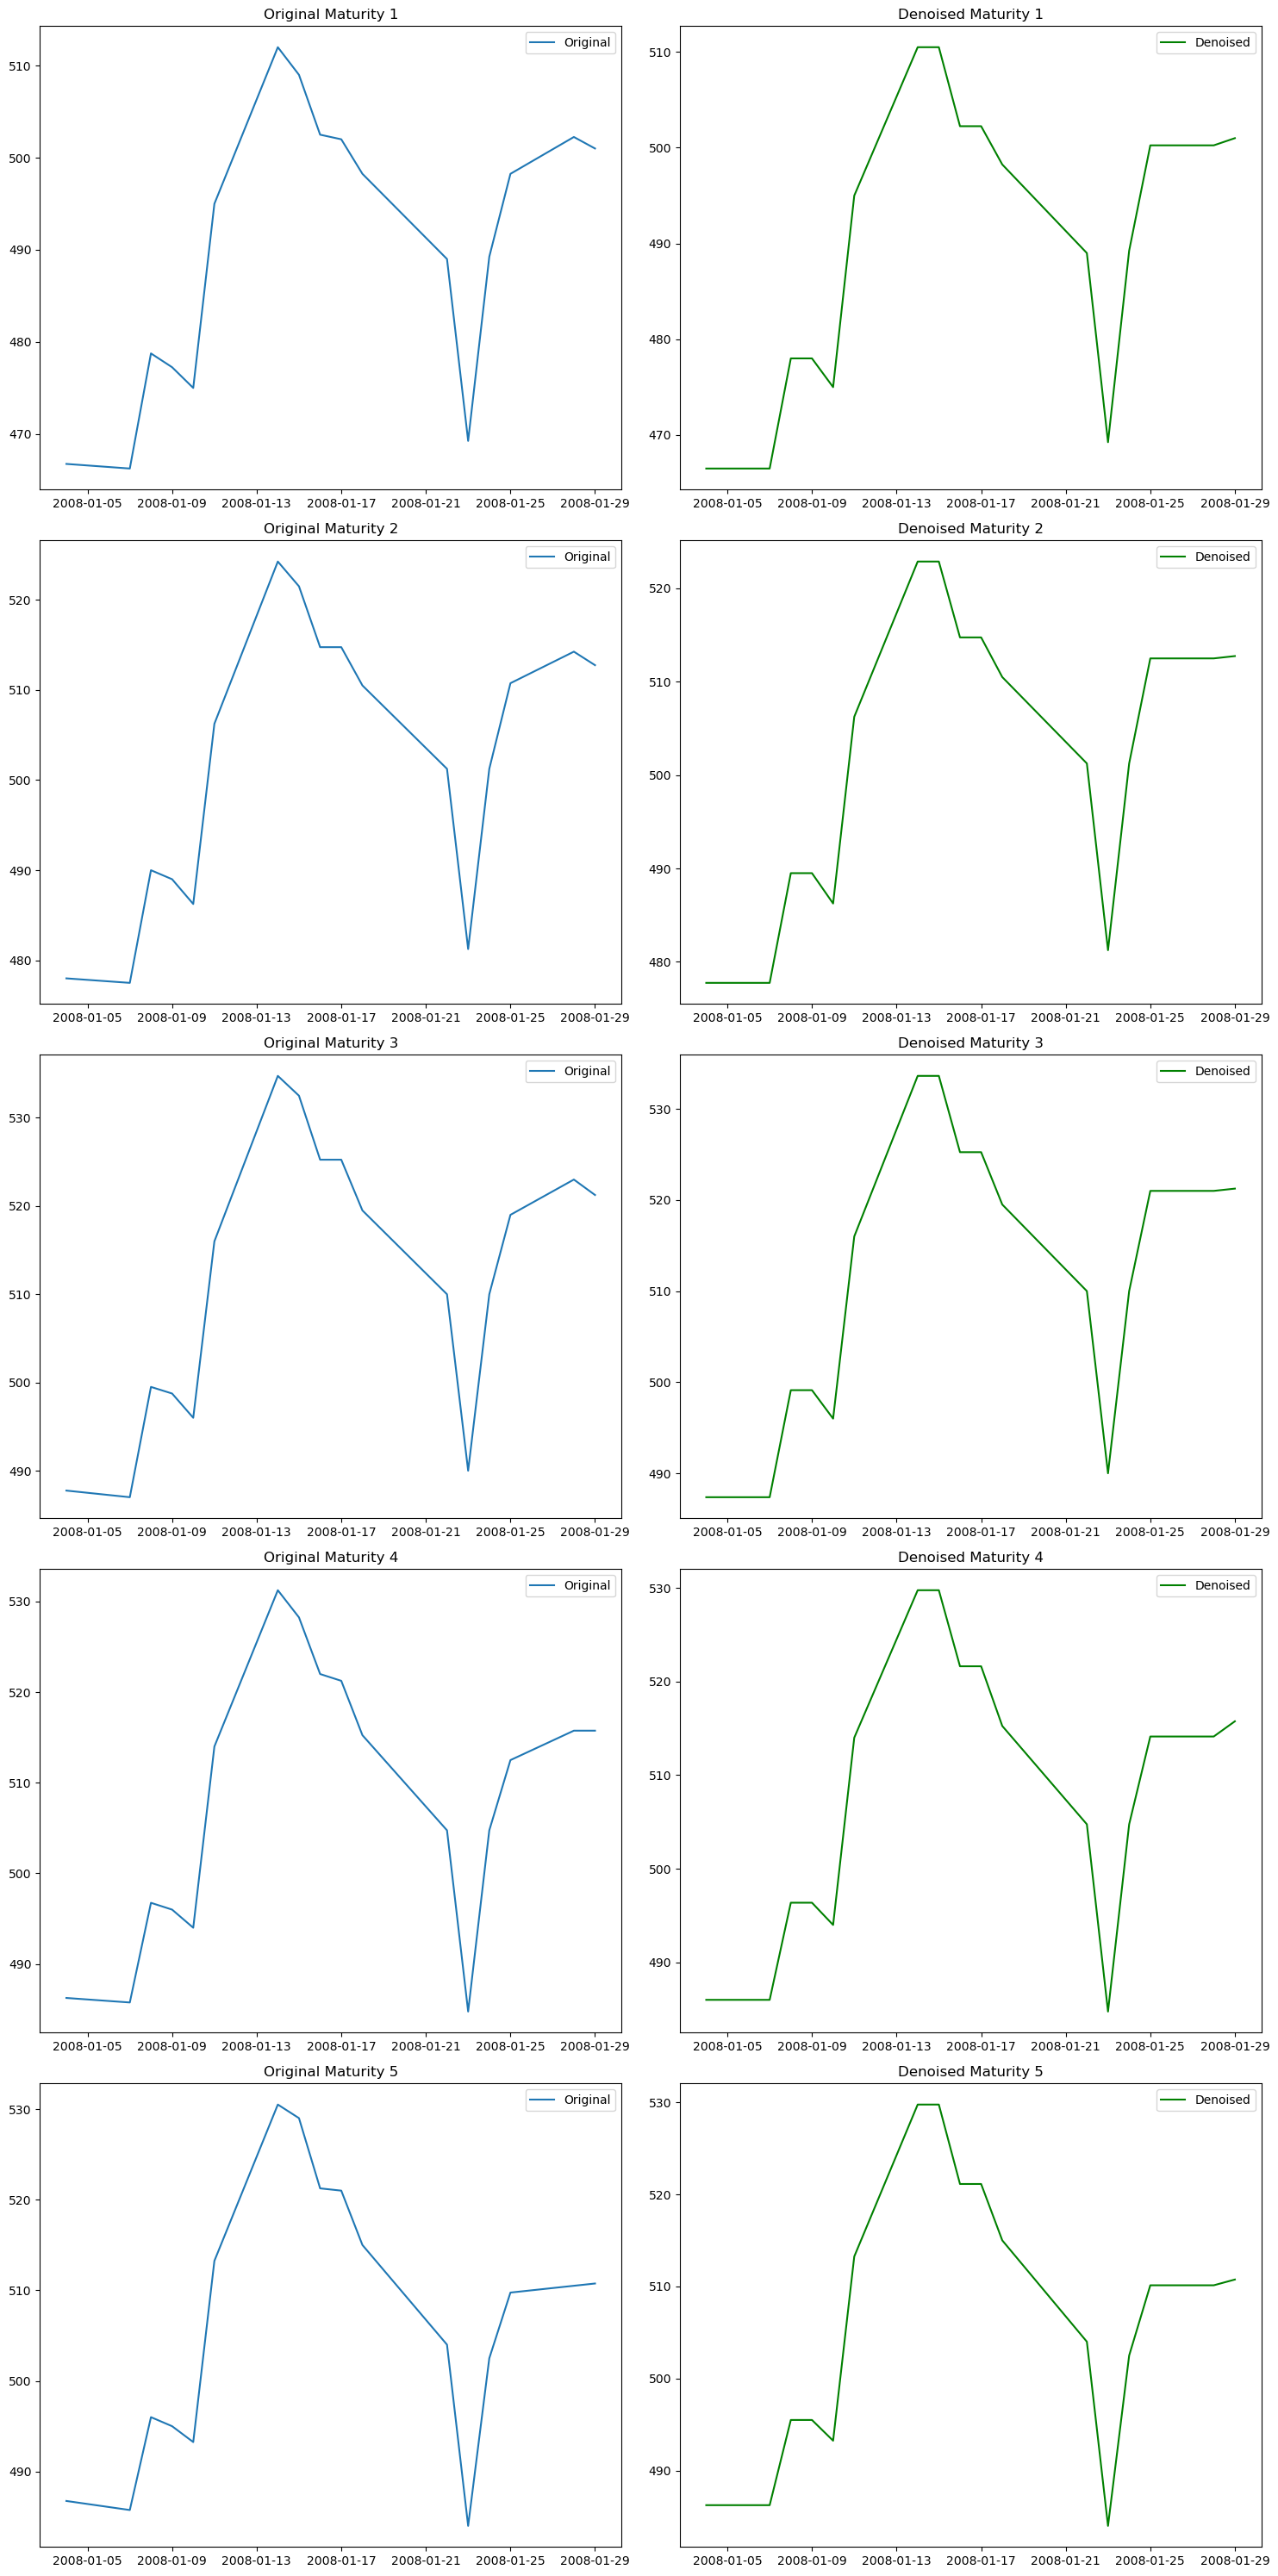

In [78]:
panel_data_df  = panel_data_df.loc["2008-01-04":"2018-01-29",:]
# Function to denoise a signal using wavelet transform
def denoise_signal(signal, wavelet='db1', level= 1, threshold=0.5, mode = 'hard'):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    coeffs_thresholded = [pywt.threshold(c, threshold, mode= mode) for c in coeffs]
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)
    return denoised_signal

# Denoising each maturity series
denoised_series = {}
for column in panel_data_df.columns:
    signal = panel_data_df[column].values
    denoised_signal = denoise_signal(signal,wavelet='db1', level= 1, threshold= 3, mode = 'hard')  # Adjust threshold if needed
    denoised_series[column] = denoised_signal[:len(panel_data_df)]  # Trim to original length if necessary

# Creating a dataframe for the denoised series
denoised_df = pd.DataFrame(denoised_series, index=panel_data_df.index)

# Plotting the original and denoised series for comparison
plt.figure(figsize=(15, 30))
for i, column in enumerate(panel_data_df.columns, 1):
    plt.subplot(len(panel_data_df.columns), 2, 2*i-1)
    plt.plot(panel_data_df.index, panel_data_df[column], label="Original")
    plt.title(f"Original {column}")
    plt.legend()

    plt.subplot(len(panel_data_df.columns), 2, 2*i)
    plt.plot(denoised_df.index, denoised_df[column], label="Denoised", color='green')
    plt.title(f"Denoised {column}")
    plt.legend()

plt.tight_layout()
plt.show()

In [79]:
panel_data_df.loc["2018-01-04":"2018-01-10",:]

,Maturity 1,Maturity 2,Maturity 3,Maturity 4,Maturity 5
index,,,,,


In [80]:
denoised_df.loc["2018-01-04":"2018-01-10",:]

,Maturity 1,Maturity 2,Maturity 3,Maturity 4,Maturity 5
index,,,,,
